In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [12]:
link_data = gpd.read_file('C:/Users/minseo/Documents/충청남도 아산시_어린이보호구역(SHP)_20221215/RDL_SCHO_AS.shp', encoding='utf-8')

In [13]:
link_data.head()

,FTR_CDE,FTR_IDN,HJD_CDE,SHT_NUM,MNG_CDE,SCH_NAM,BAS_LOC,SCH_YMD,PRI_NAM,SYS_CHK,geometry
0,AE980,1,4420025300,36701094,MNG011,b'bec6bbeabacfbcf6c3cab5eec7d0b1b3',b'b9e8b9e6c0bec8a3bcadb7ce343035',NaN,b'c0b1c0bac1f8b1b3c0e5',1,"MULTIPOLYGON (((207007.529 463083.285, 206996...."
1,AE980,2,4420033000,36701083,MNG011,b'c5c1c1a4b9ccb7a1c3cab5eec7d0b1b3',b'c3e6c3bbb3b2b5b5bec6bbeabdc3c5c1c1a4b8e9c5c1...,19000101,b'bfc0c0d3bcaeb1b3c0e5',1,"POLYGON ((205613.608 466517.852, 205614.014 46..."
2,AE980,3,4420025300,36701093,MNG011,b'bfa4b8aec6aebeeeb8b0c0ccc1fd',b'c3e6b3b220bec6bbeabdc320b9e8b9e6c0be20bacfbc...,NaN,NaN,1,"MULTIPOLYGON (((206363.800 463930.930, 206364...."
3,AE980,4,4420025300,36701093,MNG011,b'c7c1b6f3c0d3c0afc4a1bff8',b'c3e6c3bbb3b2b5b520bec6bbeabdc320b9e8b9e6c0be...,NaN,NaN,1,"MULTIPOLYGON (((206587.630 463975.220, 206554...."
4,AE980,5,4420025300,36701093,MNG011,b'c1f6bfb9bdbdbeeeb8b0c0ccc1fd',b'c3e6c3bbb3b2b5b520bec6bbeabdc320b9e8b9e6c0be...,NaN,NaN,1,"POLYGON ((206354.710 463797.500, 206317.120 46..."


In [28]:
import geopandas as gpd
from shapely.geometry import Point

# SHP 파일을 불러옵니다.
shapefile_path = "C:/Users/minseo/Documents/충청남도 아산시_어린이보호구역(SHP)_20221215/RDL_SCHO_AS.shp"
gdf = gpd.read_file(shapefile_path)

# 위도와 경도 데이터를 리스트로 준비합니다.
latitude_data = [36.777298175038034, 36.77706613928242]
longitude_data = [127.00268565481686, 127.00261003414494]

# 위도와 경도 데이터를 Point 객체로 변환합니다.
geometry = [Point(lon, lat) for lon, lat in zip(longitude_data, latitude_data)]

# 위도와 경도 데이터를 포함하는 GeoDataFrame을 생성합니다.
gdf_data = gpd.GeoDataFrame({"geometry": geometry})

# gdf_data GeoDataFrame에 좌표계 정보를 설정합니다.
# 여기서는 EPSG:4326 좌표계를 가정합니다. (경도, 위도 순서)
gdf_data.crs = "EPSG:4326"


# 위도와 경도 데이터를 EPSG:5186 좌표계로 변환합니다.
# 변환된 좌표계를 gdf_data_new_crs에 저장합니다.
new_crs = "EPSG:5186"
gdf_data_new_crs = gdf_data.to_crs(new_crs)

# SHP 파일과 위도, 경도 데이터의 공간적인 겹침을 확인합니다.
intersection = gpd.sjoin(gdf_data_new_crs, gdf, how="inner")

# 겹치는 지점의 정보를 출력합니다.
print(intersection)


                        geometry  index_right FTR_CDE  FTR_IDN     HJD_CDE  \
0  POINT (200239.750 464298.500)           14   AE980       16  4420058000   
1  POINT (200233.000 464272.750)           14   AE980       16  4420058000   

    SHT_NUM MNG_CDE   SCH_NAM          BAS_LOC SCH_YMD PRI_NAM SYS_CHK  
0  36701081  MNG011  온양중앙초등학교  충청남도 아산시 중앙로 17     NaN     NaN       1  
1  36701081  MNG011  온양중앙초등학교  충청남도 아산시 중앙로 17     NaN     NaN       1  


In [14]:
plt.rcParams['figure.figsize']=(10,20)

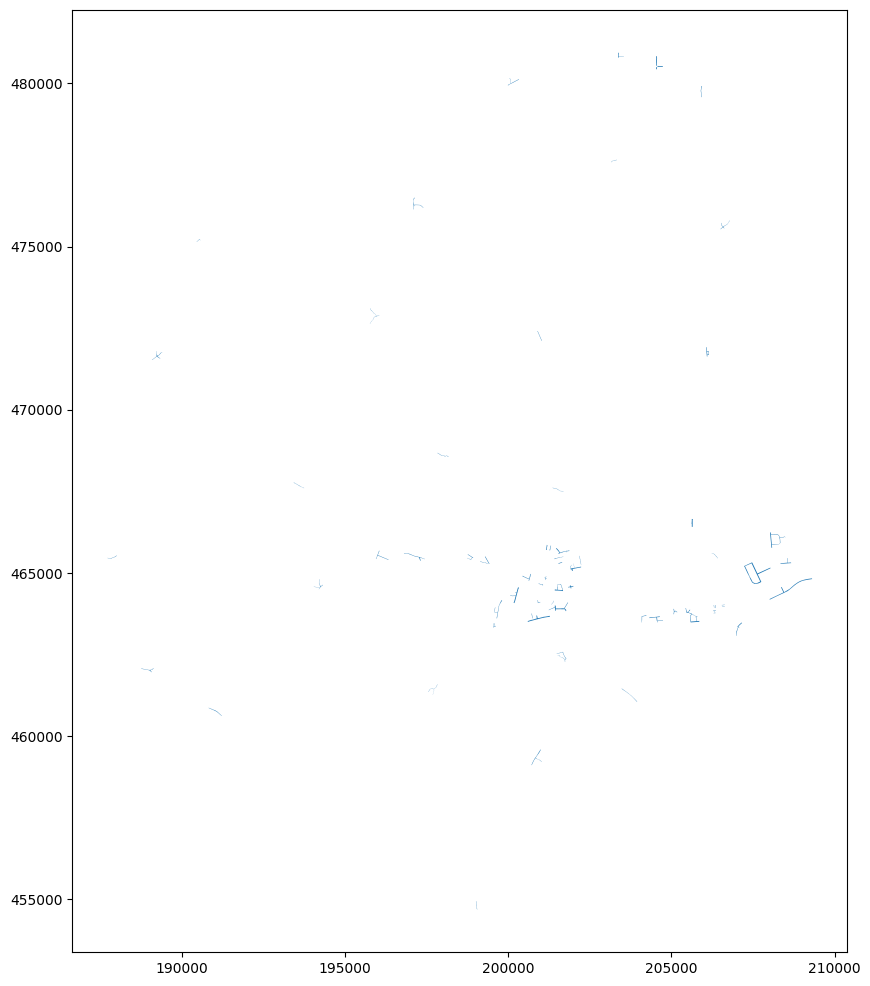

In [15]:
link_data.plot()
plt.show()

In [25]:
import geopandas as gpd
import folium

# SHP 파일을 불러옵니다.
shapefile_path = "C:/Users/minseo/Documents/충청남도 아산시_어린이보호구역(SHP)_20221215/RDL_SCHO_AS.shp"
gdf = gpd.read_file(shapefile_path)

# Folium 지도 객체를 생성합니다.
map_center = [37.5, 127.0]  # 지도 중앙 위치의 위도와 경도를 설정합니다.
m = folium.Map(location=map_center, zoom_start=10)

# GeoDataFrame의 지리 데이터를 Folium 지도에 표시합니다.
folium.GeoJson(gdf).add_to(m)

# 지도를 HTML 파일로 저장하거나, Jupyter Notebook에서 바로 출력합니다.
#m.save("map.html")
m
